In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [103]:
# img = cv2.imread('images/fetal-femur.jpg')
# img = cv2.imread('Anand_FL_HC/gnd_truth/p7.png')
# img = cv2.imread('Anand_FL_HC/gnd_truth/319_HC.png')
# img = cv2.imread('Anand_FL_HC/fetal_Head/test_set/63_HC.png')
# img = cv2.imread('mask_out.png')
img = cv2.imread('Anand_FL_HC/Fetal_femur/Patient00168_Plane5_2_of_2.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [104]:
## Contrast
alpha = 2 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)
# img_contrast = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)

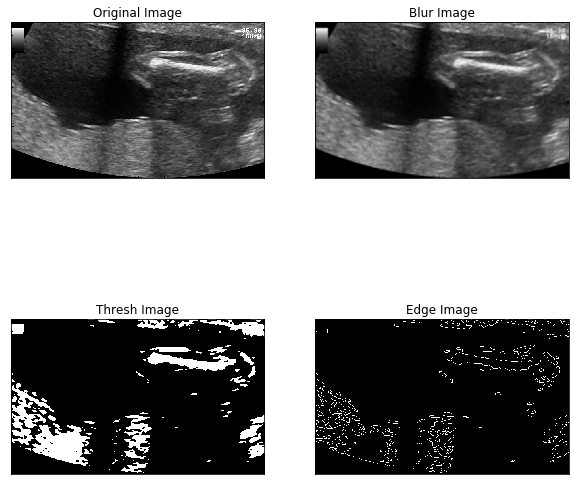

In [105]:
## Gaussian Blur
img_blur = cv2.GaussianBlur(img_gray,(5,5),cv2.BORDER_DEFAULT)
## Simple Thresholding
threshold = 113
ret,img_thresh = cv2.threshold(img_blur,threshold,255,cv2.THRESH_BINARY)
## Edge Detection
img_edges = cv2.Canny(img_thresh,100,200)
plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_blur,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_thresh,cmap = 'gray')
plt.title('Thresh Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

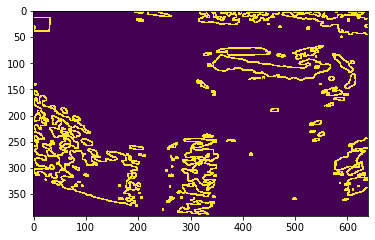

In [106]:
## Image dilation
dilated = cv2.dilate(img_edges.copy(), None, iterations=1)
plt.imshow(dilated)

In [107]:
# Finding Contours
contours, hierarchy = cv2.findContours(img_edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("number of contours=" + str(len(contours)))
largest_contour = 0
for i in range(len(contours)):
	if np.shape(contours[i])[0]>largest_contour:
		largest_contour = np.shape(contours[i])[0]
		largest_contr_idx = i
	else:pass

number of contours=279


In [108]:
empty = img.copy()
empty[:] = 0
cntimg=cv2.drawContours(empty,contours,largest_contr_idx,(255,0,0),3)
dilated_cnt = cv2.dilate(cntimg.copy(), None, iterations=1)

maxi=largest_contr_idx
for i in contours[largest_contr_idx]:
	for j in contours[largest_contr_idx]:
		dist=np.sqrt((i[0][1]-j[0][1])**2+(i[0][0]-j[0][0])**2)
		if dist > maxi:
			maxi=dist
print("maxdist",maxi)

maxdist 225.17992805754247


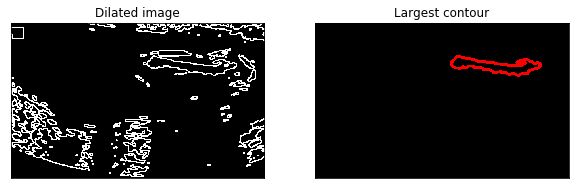

In [109]:
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(dilated,cmap = 'gray')
plt.title('Dilated image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilated_cnt)
plt.title('Largest contour'), plt.xticks([]), plt.yticks([])
plt.show()

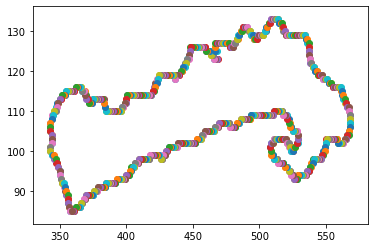

In [110]:
points = [] #contours[largest_contr_idx].squeeze()
for (a,b) in contours[largest_contr_idx].squeeze():
    plt.scatter(a,b)
    points.append((a,b))
# plt.plot(list(points))

In [111]:
dim = np.shape(img_thresh)

(0, 640)

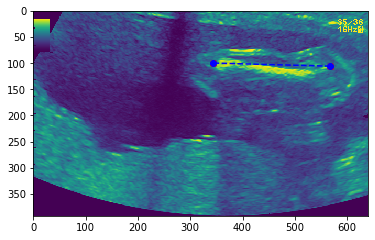

In [121]:
right = (0,0)
left = (dim[0]-1,dim[1]-1)
for a,b in points:
    if a<left[0]:
        left = (a,b)
    if a>right[0]:
        right = (a,b)
    # plt.plot(a,b,'.')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(img_gray)
plt.plot(left[0],left[1],'X',color='red')
plt.plot(right[0],right[1],'X',color='red')
plt.plot((right[0],left[0]), (right[1],left[1]), 'bo', linestyle="--")
ax.set_ylim([dim[0],0])
ax.set_xlim([0,dim[1]])

In [51]:
cntimg=cv2.drawContours(empty,c,0,(255,0,0),3)

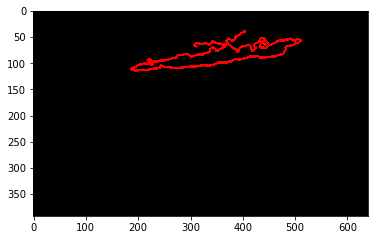

In [52]:
plt.imshow(cntimg)